## Chapter 3: Linear Regression Lab Exercises

We are going to load the "Boston Housing" data set from sklearn in order to carry out the lab exercises.

About the dataset: 
    
This dataset has 13 predictor variables ( numeric/categorical) and one target/ response variable ( "MEDV" - MEdian value of owner-occupied homes.) It has 506 observations.

The description of the various predictor/response variables is provided below:

* CRIM: per capita crime rate by town
* ZN : proportion of residential land zomed for lots over 25,000 sq. ft.
* INDUS : proportion of non-retail business acres per town
* CHAS : Charles River dummy variable (=1 if tract bounds river, 0 otherwise)
* NOX : nitric oxides concentration (parts per 10 million)
* RM : avearge number of rooms per dwelling
* AGE : proportion of owner-occupied units built prior to 1940
* DIS : weighted distances to five Boston employment centres
* RAD : index of accessibility to radial highways
* TAX : full-value property-tax rate per 10,000 dollars
* PTRATIO : pupil-teacher ratio by town
* B : 1000(Bk - 0.63)^2 where Bk is the propertion of blacks by town
* LSTAT : % lower status of the population
* MEDV : Median value of owner-occupied homes in dollar 1000's (RESPONSE/TARGET)

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston(return_X_y=False)

In [5]:
boston['feature_names'] # See feature names which we will use to setup the column names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


Creating the pandas dataframe based on the boston dataset. We use the feature_names array to assign column names to the data columns. Later, we add the target variable 'MEDV' from the target key in the dataset.

In [7]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['MEDV'] = boston.target

In [10]:
boston_df.shape # It now has 506 observations with 13 predictors and one target variable

(506, 14)

In [11]:
boston_df.isnull().any() # Check to see if any null value exists

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [12]:
boston_df.describe() # basic statistics on the data in the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


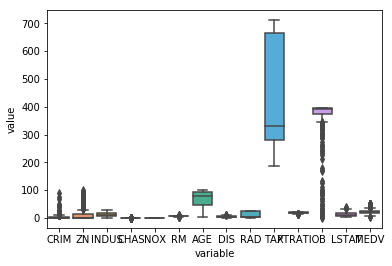

In [13]:
sns.boxplot(x="variable", y="value", data=pd.melt(boston_df)) # same as boston+df.boxplot()

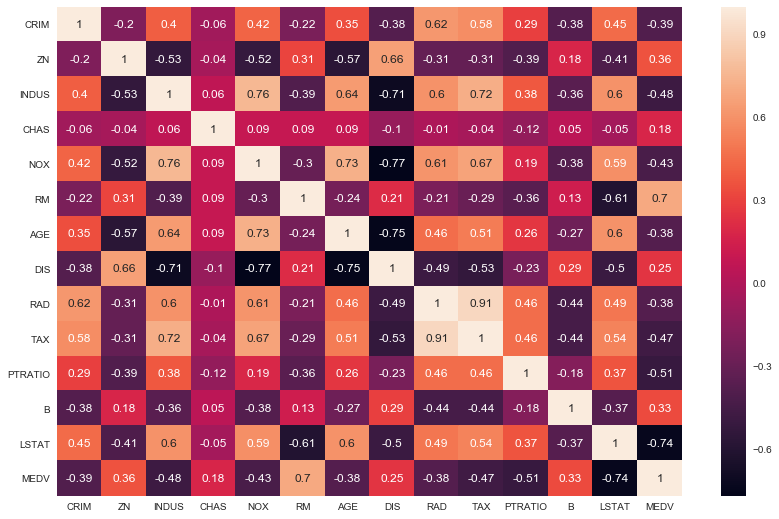

In [14]:
# Check the correlation of different variables with each other and with the target variable
boston_corr_matrix = boston_df.corr().round(2)

sns.set(rc={'figure.figsize': (14,9)})
sns.heatmap(data=boston_corr_matrix, annot=True) # Annot = True to print the values inside the square

plt.show()

Let's run linear regression on the data set. We will regress 'MEDV' over 'LSTAT' as it shows the highest correlation.

### Simple Linear Regression

In [15]:
X = pd.DataFrame(boston_df['LSTAT'], columns=['LSTAT']) # Important to create a dataframe as opposed to a Series as the model expects a 2D array
y = boston_df['MEDV']

In [16]:
X.shape

(506, 1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

print("Training X shape : " + str(X_train.shape) + ", y shape : " + str(y_train.shape))
print("Test X shape : " + str(X_test.shape) + ", y shape : " + str(y_test.shape))

Training X shape : (404, 1), y shape : (404,)
Test X shape : (102, 1), y shape : (102,)


In [18]:
# We now setup a linear regression model. First, we train it over the training data and then test it on the test set.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lModel = LinearRegression()
lModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Training set
--------------------------------------
RMSE is 6.201452973865344
R2 score is 0.5523019908037391




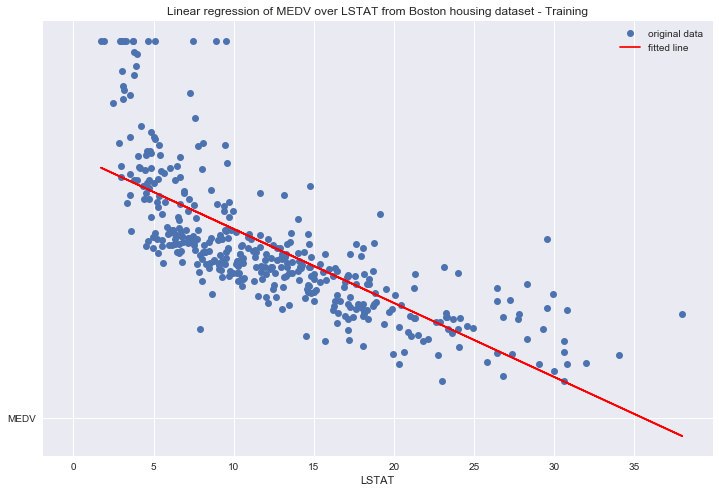

Test set
--------------------------------------
RMSE is 6.2307165730986815
R2 score is 0.5041523728903132


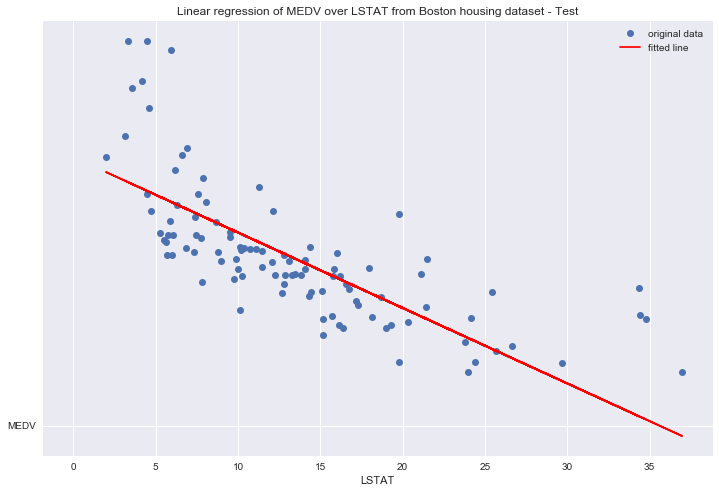

In [19]:
# model evaluation for training set
y_train_predict = lModel.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("Training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

plt.figure(figsize=(12,8))
plt.plot(X_train,y_train,'o', label='original data')
plt.plot(X_train,y_train_predict, 'r', label='fitted line')
plt.xlabel('LSTAT')
plt.plot('MEDV')
plt.title('Linear regression of MEDV over LSTAT from Boston housing dataset - Training')
plt.legend()
plt.show()

# model evaluation for testing set
y_test_predict = lModel.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Test set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

plt.figure(figsize=(12,8))
plt.plot(X_test,y_test,'o', label='original data')
plt.plot(X_test,y_test_predict, 'r', label='fitted line')
plt.xlabel('LSTAT')
plt.plot('MEDV')
plt.title('Linear regression of MEDV over LSTAT from Boston housing dataset - Test')
plt.legend()
plt.show()

### Diagnostic Plot - Residuals vs Fitted

No handles with labels found to put in legend.


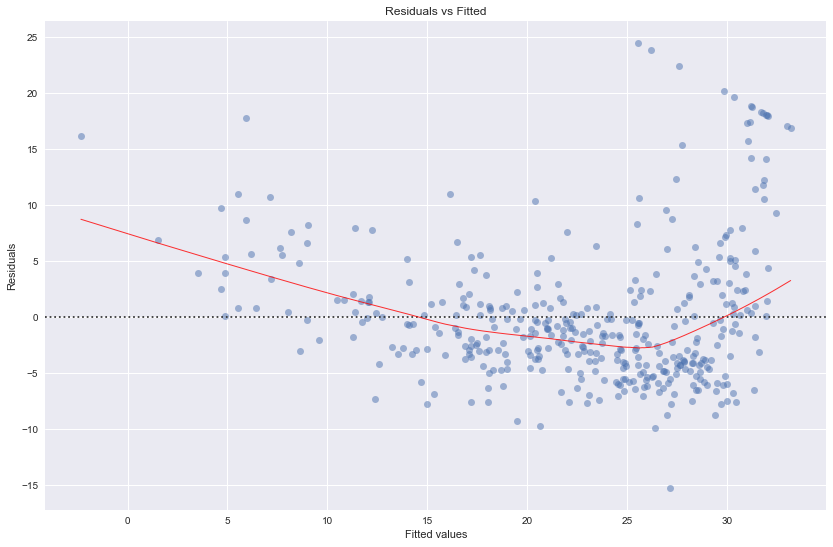

In [20]:
plt.figure()
sns.residplot(y_train_predict,y_train, lowess=True, scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.legend()
plt.show()

From the above plot, we can see some evidence of non-linearity. An ideal Residuals vs Fitted plot would look rather like random noise.

### Multiple Linear Regression

Now, we run linear regression over all the predictors.

In [21]:
Xm = boston_df.drop(['MEDV'], axis=1)
ym = boston_df['MEDV']

In [22]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,ym,test_size=0.2,random_state=5)

print("Training X shape : " + str(Xm_train.shape) + ", y shape : " + str(ym_train.shape))
print("Test X shape : " + str(Xm_test.shape) + ", y shape : " + str(ym_test.shape))

Training X shape : (404, 13), y shape : (404,)
Test X shape : (102, 13), y shape : (102,)


In [23]:
lmModel = LinearRegression()
lmModel.fit(Xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# model evaluation for training set
ym_train_predict = lmModel.predict(Xm_train)
rmse = (np.sqrt(mean_squared_error(ym_train, ym_train_predict)))
r2 = r2_score(ym_train, ym_train_predict)

print("Training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

# model evaluation for testing set
ym_test_predict = lmModel.predict(Xm_test)
rmse = (np.sqrt(mean_squared_error(ym_test, ym_test_predict)))
r2 = r2_score(ym_test, ym_test_predict)

print("Test set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

Training set
--------------------------------------
RMSE is 4.740823080328723
R2 score is 0.7383590299644472


Test set
--------------------------------------
RMSE is 4.571962782041524
R2 score is 0.7330206818709294


As we can see, running regression over all the predictors has improved our model as evidenced by lower RMSE and higher R2 score compared to the simple linear regression using 'LSTAT'.

In [25]:
lmModel.coef_ # coefficients

array([-1.30297070e-01,  4.93739220e-02,  1.52699792e-03,  2.70755661e+00,
       -1.60074619e+01,  3.40741645e+00,  1.18339212e-03, -1.49381089e+00,
        3.64266500e-01, -1.31647943e-02, -9.53457936e-01,  1.18685182e-02,
       -5.94883957e-01])

### Interaction Terms

In [26]:
Xi = pd.DataFrame(boston_df['LSTAT'],columns=['LSTAT'])
Xi['AGE'] = boston_df['AGE']
Xi['LSTAT-AGE'] = boston_df['LSTAT']*boston_df['AGE']
yi = boston_df['MEDV']

In [27]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi,yi,test_size=0.2,random_state=5)

In [28]:
liModel = LinearRegression()
liModel.fit(Xi_train, yi_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# model evaluation for training set
yi_train_predict = liModel.predict(Xi_train)
rmse = (np.sqrt(mean_squared_error(yi_train, yi_train_predict)))
r2 = r2_score(yi_train, yi_train_predict)

print("Training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

# model evaluation for testing set
yi_test_predict = liModel.predict(Xi_test)
rmse = (np.sqrt(mean_squared_error(yi_test, yi_test_predict)))
r2 = r2_score(yi_test, yi_test_predict)

print("Test set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

Training set
--------------------------------------
RMSE is 6.136217271831255
R2 score is 0.561671498074778


Test set
--------------------------------------
RMSE is 6.108086435261693
R2 score is 0.523478395971029


As we can see, a linear regression model using LSTAT, AGE and their interaction terms performs better than the model using only LSTAT.

### Non-linear transformations of the Predictors

In [30]:
Xn = pd.DataFrame(boston_df['LSTAT'], columns=['LSTAT'])
Xn['LSTAT2'] = boston_df['LSTAT']**2
yn = boston_df['MEDV']

In [31]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn,yn,test_size=0.2,random_state=5)

In [32]:
lnModel = LinearRegression()
lnModel.fit(Xn_train, yn_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# model evaluation for training set
yn_train_predict = lnModel.predict(Xn_train)
rmse = (np.sqrt(mean_squared_error(yn_train, yn_train_predict)))
r2 = r2_score(yn_train, yn_train_predict)

print("Training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

# model evaluation for testing set
yn_test_predict = lnModel.predict(Xn_test)
rmse = (np.sqrt(mean_squared_error(yn_test, yn_test_predict)))
r2 = r2_score(yn_test, yn_test_predict)

print("Test set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

Training set
--------------------------------------
RMSE is 5.552029848936066
R2 score is 0.6411591817537179


Test set
--------------------------------------
RMSE is 5.332315656621559
R2 score is 0.6368350327760257


We see a signigicant improvement over the simple linear regression model when we used non-linear terms LSTAT*2.

No handles with labels found to put in legend.


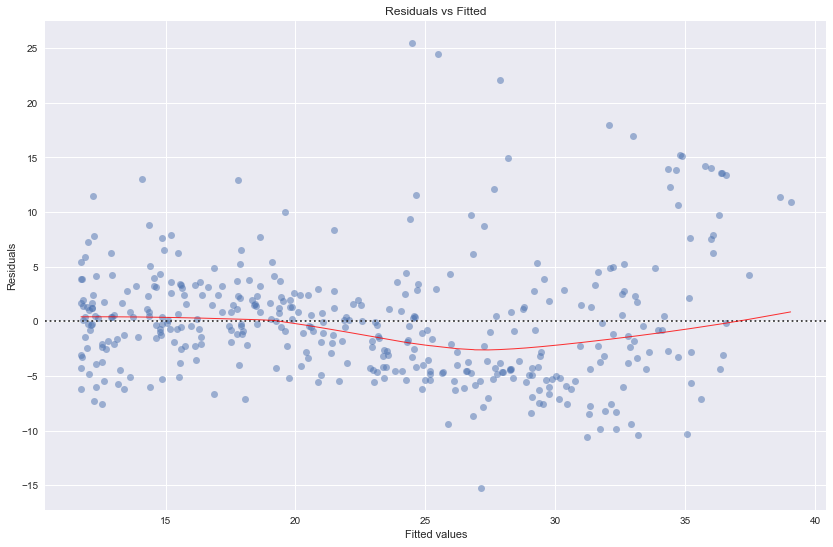

In [34]:
# Residuals vs Fitted diagnostic plot
plt.figure()
sns.residplot(yn_train_predict,yn_train, lowess=True, scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.legend()
plt.show()

As we can see the residuals are more random when using the non-linear term LSTAT*2.

### Qualitative Predictors

In [44]:
# load dataset
Carseats = pd.read_csv('Carseats.csv',header=0)
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


We use get_dummies function to generate numerical columns from string categorical values as input to the linear regression model.

In [45]:
Carseats = pd.get_dummies(Carseats, columns=['ShelveLoc'])
Carseats = pd.get_dummies(Carseats, columns=['Urban'])
Carseats = pd.get_dummies(Carseats, columns=['US'])
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [46]:
Xc = Carseats.drop(['Sales'], axis=1)
yc = Carseats['Sales']

Xc.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [47]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc,test_size=0.2,random_state=5)

print("Training X shape : " + str(Xc_train.shape) + ", y shape : " + str(yc_train.shape))
print("Test X shape : " + str(Xc_test.shape) + ", y shape : " + str(yc_test.shape))

Training X shape : (320, 14), y shape : (320,)
Test X shape : (80, 14), y shape : (80,)


In [48]:
lcModel = LinearRegression()
lcModel.fit(Xc_train, yc_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
# model evaluation for training set
yc_train_predict = lcModel.predict(Xc_train)
rmse = (np.sqrt(mean_squared_error(yc_train, yc_train_predict)))
r2 = r2_score(yc_train, yc_train_predict)

print("Training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

# model evaluation for testing set
yc_test_predict = lcModel.predict(Xc_test)
rmse = (np.sqrt(mean_squared_error(yc_test, yc_test_predict)))
r2 = r2_score(yc_test, yc_test_predict)

print("Test set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

Training set
--------------------------------------
RMSE is 0.9817985834710676
R2 score is 0.883836656816602


Test set
--------------------------------------
RMSE is 1.1033541918251195
R2 score is 0.8151119695688782


Credits: 
    
    1. ISLR book
    2. Various internet sources on linear regression model